Install and Import Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/images/
  inflating: data/images/pexels-aleksey-3680959.jpg  
  inflating: data/images/pexels-alexandre-rezende-6345100.jpg  
  inflating: data/images/pexels-anamul-rezwan-1216589.jpg  
  inflating: data/images/pexels-andrea-piacquadio-3772616.jpg  
  inflating: data/images/pexels-antoni-shkraba-production-8278912.jpg  
  inflating: data/images/pexels-antoni-shkraba-production-8278927.jpg  
  inflating: data/images/pexels-antony-trivet-12893587.jpg  
  inflating: data/images/pexels-arny-bareh-6822839.jpg  
  inflating: data/images/pexels-cecilia-ravalli-13384293.jpg  
  inflating: data/images/pexels-denniz-futalan-4956909.jpg  
  inflating: data/images/pexels-denniz-futalan-4956920.jpg  
  inflating: data/images/pexels-gustavo-fring-4872040.jpg  
  inflating: data/images/pexels-gustavo-fring-6285141.jpg  
  inflating: data/images/pexels-gustavo-fring-6285143.jpg  
  inflating: data/images/pexels-hanna-payasnikava-7788264.jpg  
  inflating: data/imag

In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.1/585.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 25.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
!cd yolov5 & pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

Load Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True, force_reload=True)
model

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


100%|██████████| 14.1M/14.1M [00:02<00:00, 7.03MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'


In [ ]:
# results = model(img)

In [ ]:
results = model('Traffic.jpg')
results.print()

image 1/1: 533x800 28 cars, 5 trucks
Speed: 38.5ms pre-process, 57.5ms inference, 20.5ms NMS per image at shape (1, 3, 448, 640)


# New Section

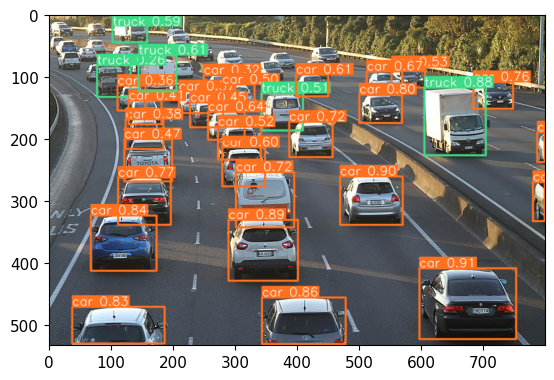

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

[array([[[251, 216, 174],
         [254, 219, 177],
         [246, 213, 168],
         ...,
         [128, 148, 146],
         [ 70,  79,  52],
         [ 64,  71,  29]],
 
        [[235, 201, 156],
         [234, 200, 155],
         [221, 189, 142],
         ...,
         [122, 141, 139],
         [ 85,  91,  65],
         [ 47,  52,  11]],
 
        [[253, 219, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [136, 155, 153],
         [ 69,  73,  46],
         [ 60,  62,  22]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

In [ ]:
cap = cv2.VideoCapture(0)


In [ ]:
print(cap.isOpened())

False


In [ ]:
ret, frame = cap.read()

In [ ]:
print(frame)

None


In [ ]:
from google.colab.patches import cv2_imshow
import cv2

Real Time Detections

In [ ]:
cap = cv2.VideoCapture('Workers.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    
    results = model(frame)# Make detections  using yolo model
    
    cv2_imshow(np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Train from scratch

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 8 --epochs 100 --data dataset.yml --weights yolov5s.pt 

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

loading costom trained model

In [57]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-15 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


In [58]:
results = model('workers5.jpg')


In [59]:
results.print()

image 1/1: 6048x4024 1 Helmet
Speed: 1136.5ms pre-process, 10.2ms inference, 3.4ms NMS per image at shape (1, 3, 640, 448)


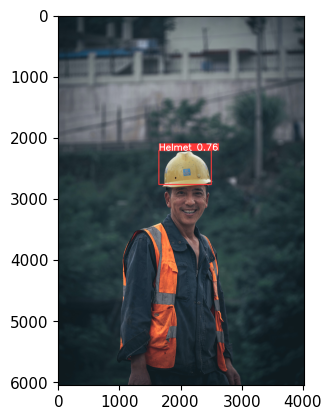

In [60]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
cap = cv2.VideoCapture('Workers.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    
    results = model(frame)# Make detections  using yolo model
    
    cv2_imshow(np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()